In [3]:
'''
Imports necessary for Data Exploration
'''
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [4]:
'''
Data Exploration
    - NaN Values 
    - Outliers
        - Numeric-Numeric
        - Numeric-Catgeorical
        - Numeric-Numeric-Numeric
        
'''


'\nData Exploration\n    - NaN Values \n    - Outliers\n        - Numeric-Numeric\n        - Numeric-Catgeorical\n        - Numeric-Numeric-Numeric\n        \n'

In [5]:
'''
Data path and using pandas to read csv file
'''
path = 'data/vehicle.csv'
df = pd.read_csv(path)

In [6]:
'''
Showing all columns and first five rows in data 
'''
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [7]:
'''
Showing how many columns (features)
'''
len(df.columns)

16

In [8]:
'''
Removing spaces from names of columns
'''
df = df.rename(columns = {"Engine Fuel Type":"Engine_Fuel_Type",
                          "Engine HP": "Engine_HP",
                          "Engine Cylinders":"Engine_Cylinders",
                          "Transmission Type":"Transmission_Type",
                          "Number of Doors":"Number_of_Doors",
                          "Market Category":"Market_Category",
                          "Vehicle Size":"Vehicle_Size",
                          "Vehicle Style":"Vehicle_Style",
                          "highway MPG":"Highway_MPG",
                          "city mpg":"City_mpg"})

In [9]:
'''
Columns names, number of rows associated with columns, number of types of data
'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
Make                 11914 non-null object
Model                11914 non-null object
Year                 11914 non-null int64
Engine_Fuel_Type     11911 non-null object
Engine_HP            11845 non-null float64
Engine_Cylinders     11884 non-null float64
Transmission_Type    11914 non-null object
Driven_Wheels        11914 non-null object
Number_of_Doors      11908 non-null float64
Market_Category      8172 non-null object
Vehicle_Size         11914 non-null object
Vehicle_Style        11914 non-null object
Highway_MPG          11914 non-null int64
City_mpg             11914 non-null int64
Popularity           11914 non-null int64
MSRP                 11914 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.5+ MB


In [10]:
'''
Data exploration begins with removing Null Values 
    - Better visualizing and analyzing 
    - Part of the data cleaning process
'''
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine_Fuel_Type        3
Engine_HP              69
Engine_Cylinders       30
Transmission_Type       0
Driven_Wheels           0
Number_of_Doors         6
Market_Category      3742
Vehicle_Size            0
Vehicle_Style           0
Highway_MPG             0
City_mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [11]:
'''
Removing NaN values from volumns
    - Depends on data type of column what we fill it with
   
Type of Data in column
    - Getting value counts for data to determine what to fill null values with 

'''
type(df.Engine_Fuel_Type[0])

str

In [12]:
'''
Dropping NaN values from data set that do not have many NaN values
    - Engine_Fuel_Type
    - Number_of_Doors
    
    
dropna() on whole dataset lets us specify what columns to remove NaN from 

'''
df.dropna(subset = ['Engine_Fuel_Type','Number_of_Doors'], inplace = True)

In [13]:
'''
Verifying that NaN values are dropped

'''
df.Engine_Fuel_Type.isnull().sum()

0

In [14]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine_Fuel_Type        0
Engine_HP              64
Engine_Cylinders       30
Transmission_Type       0
Driven_Wheels           0
Number_of_Doors         0
Market_Category      3739
Vehicle_Size            0
Vehicle_Style           0
Highway_MPG             0
City_mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [15]:
Engine_HP_mode = df.Engine_HP.mode()[0]
df.Engine_HP.fillna(Engine_HP_mode,inplace = True)
#df.Engine_HP.isnull().sum()

#df.Engine_Cylinders.unique()
Engine_Cylinders_mode = df.Engine_Cylinders.mode()[0]
df.Engine_Cylinders.fillna(Engine_Cylinders_mode,inplace = True)
#df.Engine_Cylinders.isnull().sum()

#len(df.Market_Category.unique())
Market_Category_mode = df.Market_Category.mode()[0]
df.Market_Category.fillna(Market_Category_mode,inplace = True)


In [16]:
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine_Fuel_Type     0
Engine_HP            0
Engine_Cylinders     0
Transmission_Type    0
Driven_Wheels        0
Number_of_Doors      0
Market_Category      0
Vehicle_Size         0
Vehicle_Style        0
Highway_MPG          0
City_mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [17]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine_Fuel_Type', 'Engine_HP',
       'Engine_Cylinders', 'Transmission_Type', 'Driven_Wheels',
       'Number_of_Doors', 'Market_Category', 'Vehicle_Size', 'Vehicle_Style',
       'Highway_MPG', 'City_mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [18]:
df.Popularity.unique()

array([3916, 3105,  819,  617, 1013, 2009,  870,  586,  436, 2774,  113,
       2031,  416,   67,  210, 1715,  376,  549, 1439,  535, 2202,   26,
        481, 5657, 1624, 1720,  520, 1385, 1851, 1158,   61,  640,  873,
          2,  155,  204,   86,  238,  454,  259,  258,  613,  190,  105,
         21,  130, 1391,  820])

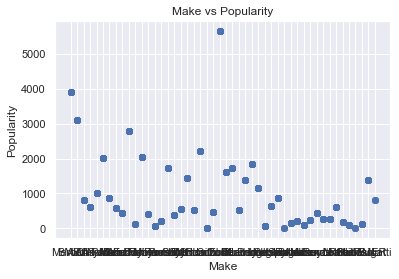

In [19]:
'''
Numeric-Numeric
    Scatter
    pair
    correlation
'''

plt.scatter(df.Make,df.Popularity)
plt.title('Make vs Popularity')
plt.xlabel('Make')
plt.ylabel('Popularity')
plt.show()


In [20]:
'''
Numeric-Categorical

    mean
    median
    boxplot
    
'''
print('Procedures')



Procedures


In [21]:
'''
Mean
'''

fig = plt.figure(figsize=(5,5))


<Figure size 360x360 with 0 Axes>

In [168]:
# plotting this many values 
    # Making a bigger figure
        # plotting data inside bigger figure 
values = df.groupby('Make')['Popularity'].mean()

In [174]:
type(values)

pandas.core.series.Series

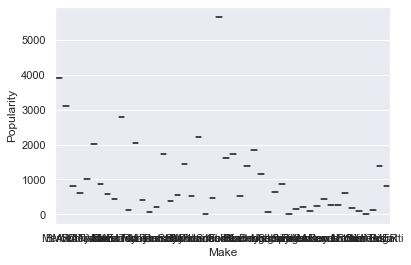

In [159]:
sns.boxplot(df.Make, df.Popularity)
plt.show()

In [156]:
df[['Make']].corr()

""


In [157]:
corr

,Popularity
Popularity,1.0


In [144]:
df.Make.unique()

array(['BMW', 'Audi', 'FIAT', 'Mercedes-Benz', 'Chrysler', 'Nissan',
       'Volvo', 'Mazda', 'Mitsubishi', 'Ferrari', 'Alfa Romeo', 'Toyota',
       'McLaren', 'Maybach', 'Pontiac', 'Porsche', 'Saab', 'GMC',
       'Hyundai', 'Plymouth', 'Honda', 'Oldsmobile', 'Suzuki', 'Ford',
       'Cadillac', 'Kia', 'Bentley', 'Chevrolet', 'Dodge', 'Lamborghini',
       'Lincoln', 'Subaru', 'Volkswagen', 'Spyker', 'Buick', 'Acura',
       'Rolls-Royce', 'Maserati', 'Lexus', 'Aston Martin', 'Land Rover',
       'Lotus', 'Infiniti', 'Scion', 'Genesis', 'HUMMER', 'Tesla',
       'Bugatti'], dtype=object)